## Convolutional Neural Networks (CNN)

Una Red Neuronal Convolucional (Convolutional Neural Networks) tiene una estructura similar a un perceptrón multicapa; están formadas por neuronas que tienen parámetros en forma de pesos y biases.

Las redes neuronales convolucionales están formadas de muchas capas **CONVOLUCIONALES** (CONV) y capas de submuestreo, conocidas como **POOLING**. Seguidas por una o más capas.

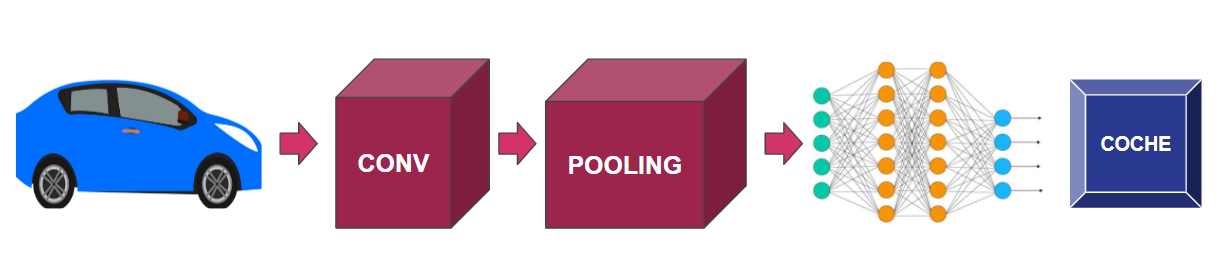

La capa convolucional aprende patrones locales dentro de la imagen en pequeñas ventanas de 2 dimensiones.

De forma general podemos decir que el propósito de la capa convolucional es detectar características o rasgos visuales en las imágenes que utiliza para el aprendizaje.

Estas características que aprende pueden ser: aristas, colores, formas, conjuntos de píxeles.


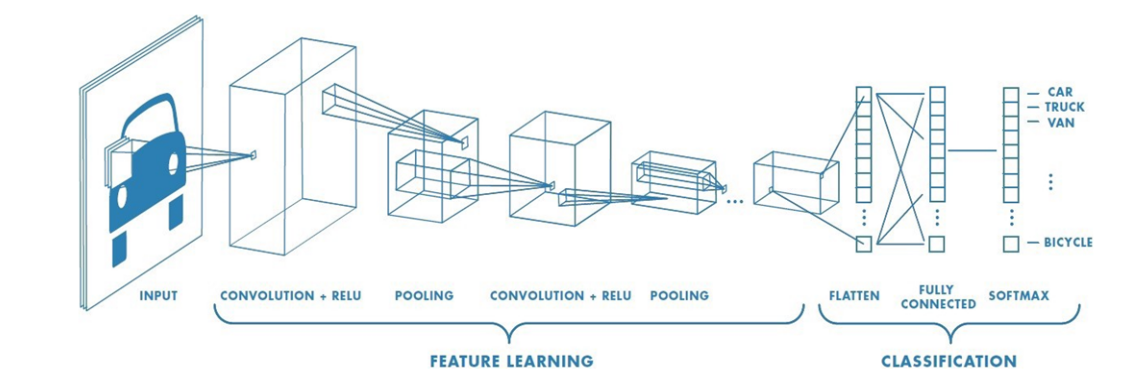

- De manera intuitiva, se puede decir que una capa convolucional es detectar características o rasgos visuales en las imágenes, como aristas, líneas, gotas de color, partes de una cara. 


- Esto ayuda a que una vez que la red aprendió esta característica, la puede reconocer en cualquier imagen.


- En general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps) donde se tienen las dimensiones de largo y ancho y una tercera que es el canal de las capas RGB.

### Convolucion: 

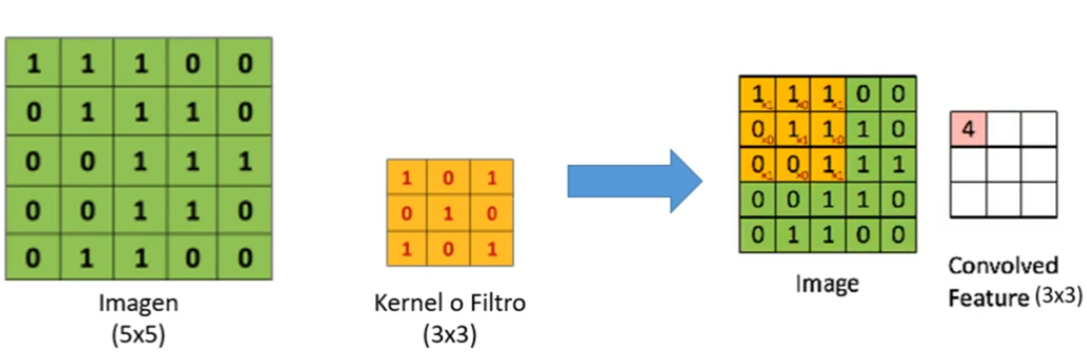

### Pooling:

- Esta capa se suele aplicar inmediatamente después de la capa de convolución.


- Lo que hace la capa de pooling de manera simplificada es: reducir la información recogida por la capa convolucional y crean una versión condensada de la información contenida en esta capa.


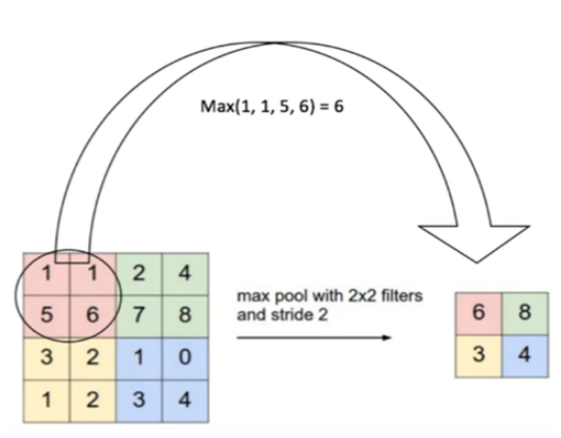

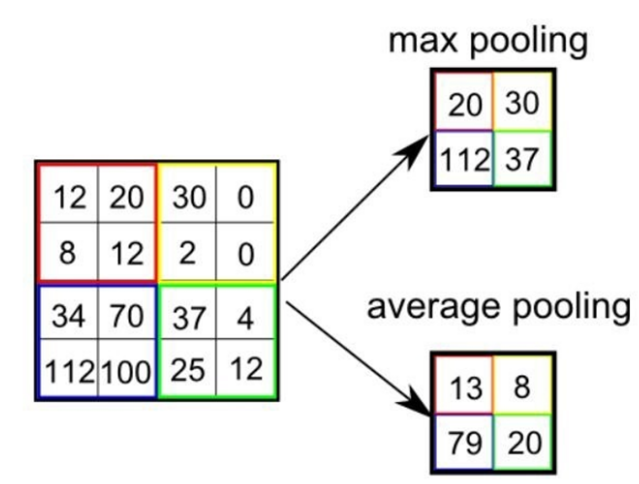

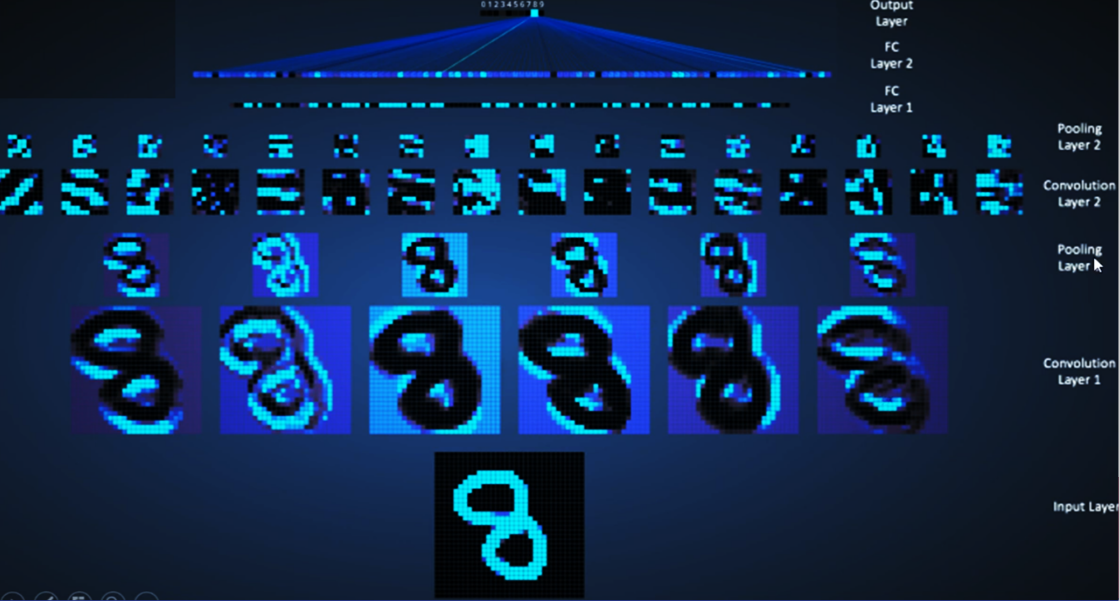

In [1]:
################################################################################################################################

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.datasets import mnist

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

C:\Users\danie\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


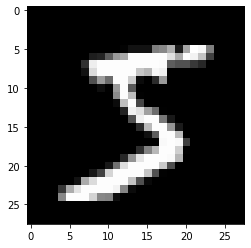

In [4]:
plt.imshow(X_train[0], cmap = "gray")
plt.show()

In [5]:
y_train[0]

5

### Preprocesamiento

In [6]:
# En este ejemplo agregamos una cuarta dimension, que sería la cantidad de canales de cada imagen.
# Vamos a usar la imagen en forma de matriz como entrada en el modelo.

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# Normalizacion
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (60000, 28, 28, 1) (60000, 10)
Test: (10000, 28, 28, 1) (10000, 10)


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
num_classes = len(y_train[0])
num_classes

10

### Convolutional Neural Network

En este tipo de arquitecturas, el modelo puede tomar imagenes en forma de matriz.

In [9]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada (Convolucion)
model.add(Conv2D(filters = 32, kernel_size = (5, 5),
                 activation = "relu", input_shape = (28, 28, 1))) # La capa de convolución siempre lleva relu

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolucion
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = "relu"))

# Pooling
model.add(AveragePooling2D(pool_size = (2, 2)))

# Flatten (Las aplanamos para seguir con la red neuronal)
model.add(Flatten())

# Capas Ocultas
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

# Capa de Salida (Si es un problema de clasificación multiple siempre debe terminar con "softmax")
model.add(Dense(num_classes, activation = "softmax"))

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 average_pooling2d (AverageP  (None, 4, 4, 32)         0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               1

In [10]:
# Compilamos el modelo
model.compile(loss      = "categorical_crossentropy",
              optimizer = "adam",
              metrics   = ["accuracy"])

# Entrenamos el modelo
model.fit(x = X_train, y = y_train,
          validation_data = (X_test, y_test),
          batch_size = 100, epochs = 20)

Epoch 1/20
600/600 [==============================] - 22s 36ms/step - loss: 0.2116 - accuracy: 0.9345 - val_loss: 0.0573 - val_accuracy: 0.9816
Epoch 2/20
600/600 [==============================] - 22s 36ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 3/20
600/600 [==============================] - 22s 36ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0314 - val_accuracy: 0.9893
Epoch 4/20
600/600 [==============================] - 22s 37ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 5/20
600/600 [==============================] - 23s 38ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0281 - val_accuracy: 0.9905
Epoch 6/20
600/600 [==============================] - 24s 40ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 7/20
600/600 [==============================] - 33s 55ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0328 - val_accuracy:

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)

313/313 [==============================] - 6s 15ms/step - loss: 0.0351 - accuracy: 0.9930
Test accuracy: 0.9929999709129333


In [12]:
# Predicciones
y_hat = model.predict(X_test)
y_hat

313/313 [==============================] - 5s 15ms/step


array([[7.12300244e-15, 1.80601423e-10, 3.80304573e-11, ...,
        1.00000000e+00, 5.20502695e-13, 5.63101521e-09],
       [7.64049943e-14, 1.29767291e-11, 1.00000000e+00, ...,
        9.06171663e-17, 4.87875571e-19, 4.84834752e-19],
       [9.99739388e-11, 1.00000000e+00, 1.08242845e-10, ...,
        2.90001001e-08, 5.84902304e-09, 3.42875229e-12],
       ...,
       [8.68740855e-19, 1.60103566e-13, 9.35966495e-20, ...,
        4.38630356e-19, 3.86605001e-16, 6.65905455e-14],
       [3.37062870e-15, 7.12568204e-18, 4.74883713e-22, ...,
        4.29763110e-17, 2.05401207e-08, 3.39784260e-15],
       [1.04432166e-11, 6.97043106e-15, 2.35165511e-12, ...,
        6.94315181e-22, 8.27642737e-14, 1.46342788e-18]], dtype=float32)

In [13]:
# Revertimos One-Hot Encoding

y_hat = [np.argmax(i) for i in y_hat]
y_test = [np.argmax(i) for i in y_test]

In [14]:
confusion_matrix(y_test, y_hat)

array([[ 978,    0,    0,    0,    0,    0,    0,    0,    1,    1],
       [   0, 1134,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    1, 1028,    1,    0,    0,    0,    2,    0,    0],
       [   0,    1,    1, 1004,    0,    1,    0,    1,    2,    0],
       [   0,    0,    0,    0,  977,    0,    2,    0,    0,    3],
       [   3,    0,    0,    7,    0,  881,    1,    0,    0,    0],
       [   6,    2,    1,    0,    2,    0,  945,    0,    1,    1],
       [   0,    4,    2,    0,    2,    0,    0, 1017,    0,    3],
       [   2,    0,    0,    0,    0,    1,    0,    0,  970,    1],
       [   1,    0,    0,    1,    8,    1,    0,    2,    0,  996]],
      dtype=int64)

### Filtros

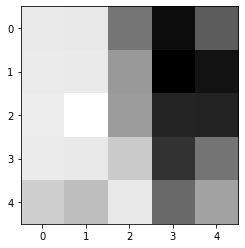

In [15]:
filters, _ = model.layers[0].get_weights()

f = filters[:, :, :, 0]

fmax = filters.max()
fmin = filters.min()


filters = (filters - fmin) / (fmax - fmin)

f = filters[:, :, :, 0]

plt.imshow(f, cmap = "gray")
plt.show()

In [16]:
f

array([[[0.836388  ],
        [0.834541  ],
        [0.6430324 ],
        [0.47011906],
        [0.6012562 ]],

       [[0.83830386],
        [0.8362575 ],
        [0.7032987 ],
        [0.44855982],
        [0.48094335]],

       [[0.8428003 ],
        [0.8726483 ],
        [0.7068315 ],
        [0.5114924 ],
        [0.5054584 ]],

       [[0.84112644],
        [0.8336727 ],
        [0.7847129 ],
        [0.53273016],
        [0.6415267 ]],

       [[0.79300433],
        [0.7639179 ],
        [0.83485484],
        [0.6233142 ],
        [0.7172679 ]]], dtype=float32)

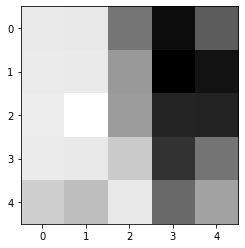

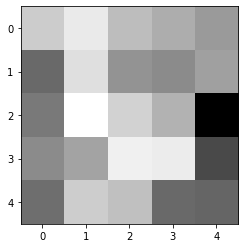

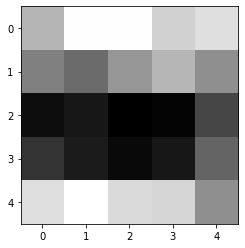

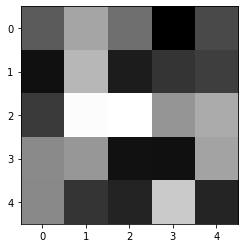

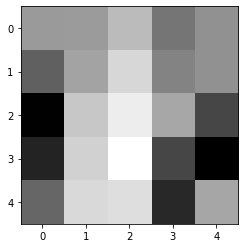

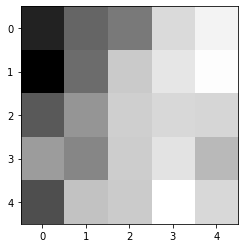

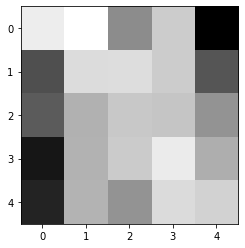

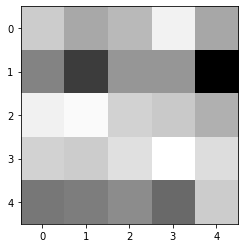

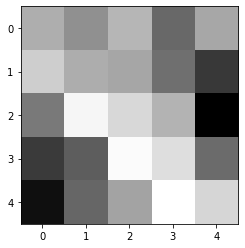

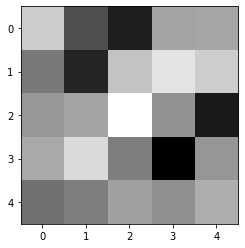

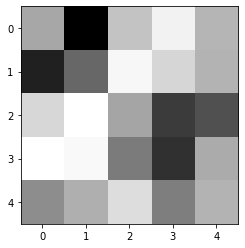

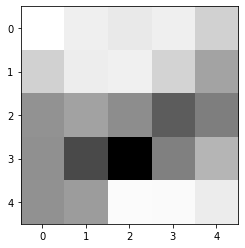

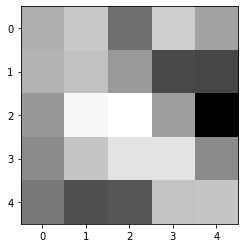

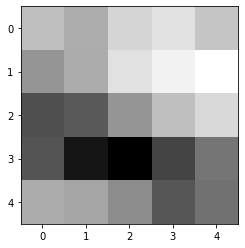

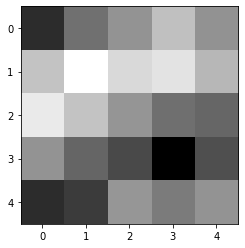

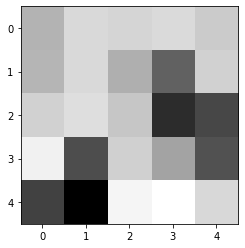

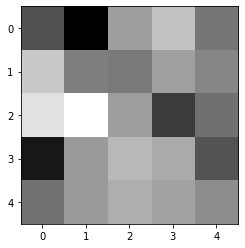

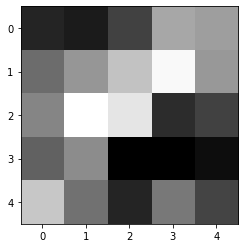

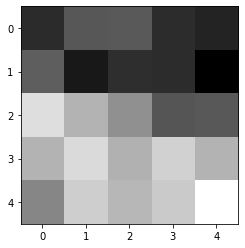

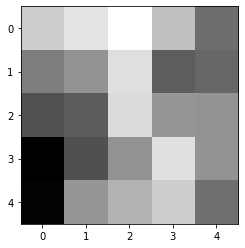

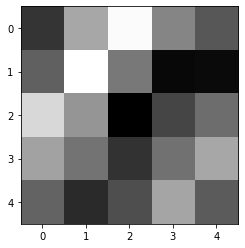

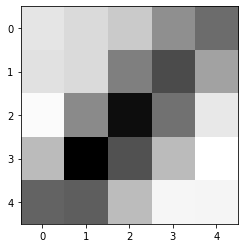

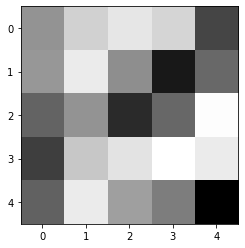

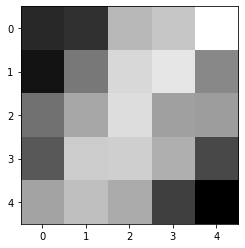

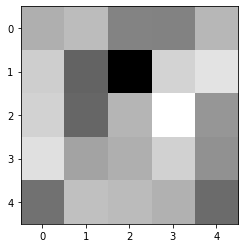

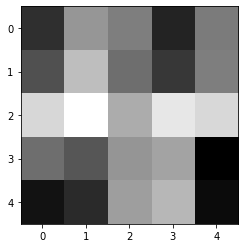

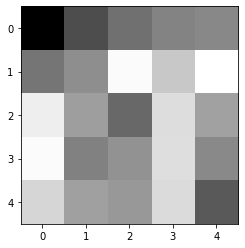

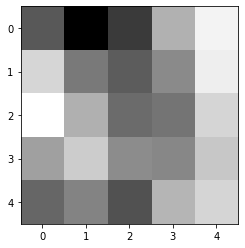

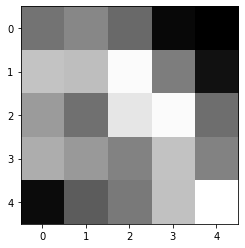

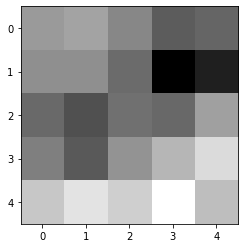

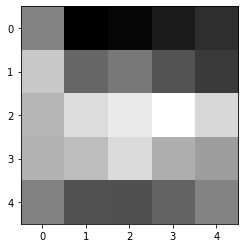

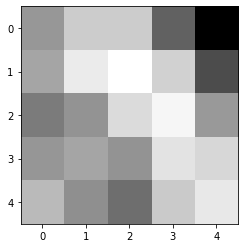

In [17]:
for i in range(filters.shape[-1]):
    plt.imshow(filters[:, :, :, i], cmap = "gray")
    plt.show()

In [18]:
################################################################################################################################